In [1]:
import sys
sys.path.append('../')
from fcc import *

---
Read cerebellum dataset to `pita` object

In [2]:
%time cerebellum_slide = pita.from_file(datafile='../inputs/cerebellum_slice_rna.csv.gz', beadfile='../inputs/cerebellum_slice_beads.csv.gz', data_type='counts')

CPU times: user 50.3 s, sys: 2.38 s, total: 52.7 s
Wall time: 53.3 s


Create pixel map for cerebellum dataset to create images from

In [3]:
%time cerebellum_slide.map_pixels()

CPU times: user 2.48 s, sys: 67.4 ms, total: 2.54 s
Wall time: 2.57 s


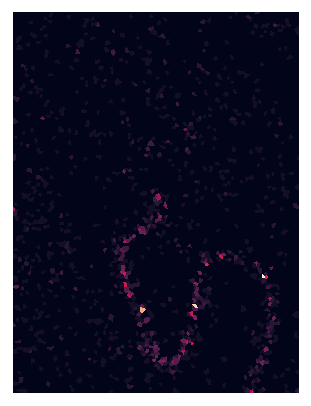

CPU times: user 1.14 s, sys: 48.5 ms, total: 1.19 s
Wall time: 1.09 s


In [4]:
%time aldoc = cerebellum_slide.assemble_pita(data_type='counts', feature='Aldoc', plot_out=True)

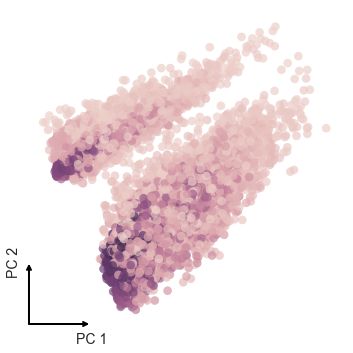

CPU times: user 16.8 s, sys: 3.27 s, total: 20.1 s
Wall time: 17.5 s


In [5]:
%%time 
cerebellum_slide.fcc_PCA(data_type='counts', n_components=10, transform='arcsinh')
cerebellum_slide.plot(data_type='PCA')

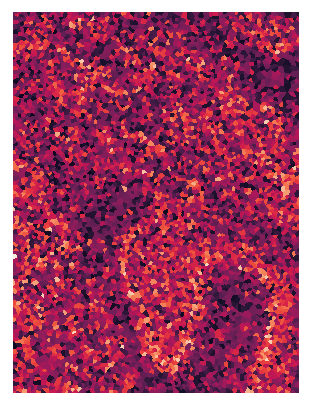

In [11]:
PC1 = cerebellum_slide.assemble_pita(data_type='PCA', feature=0, plot_out=True)

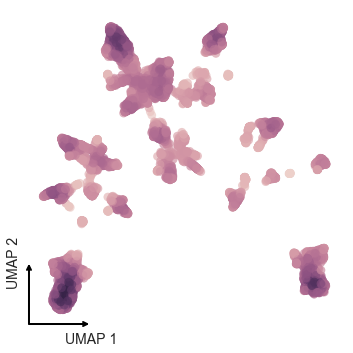

CPU times: user 26.5 s, sys: 1.13 s, total: 27.6 s
Wall time: 27.2 s


In [6]:
%%time 
cerebellum_slide.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)
cerebellum_slide.plot(data_type='UMAP')

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ef14978>)

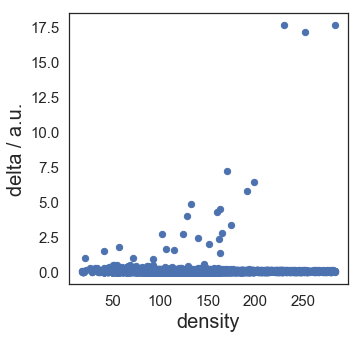

In [7]:
cerebellum_slide.clu['UMAP'].draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1249b1780>)

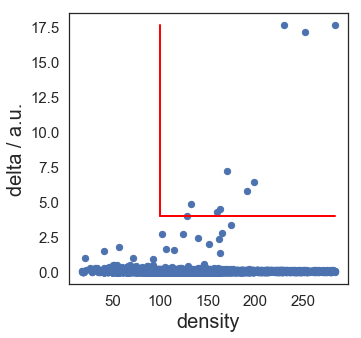

In [9]:
cerebellum_slide.clu['UMAP'].assign(100,4)
cerebellum_slide.clu['UMAP'].draw_decision_graph(min_density=cerebellum_slide.clu['UMAP'].min_density, min_delta=cerebellum_slide.clu['UMAP'].min_delta)

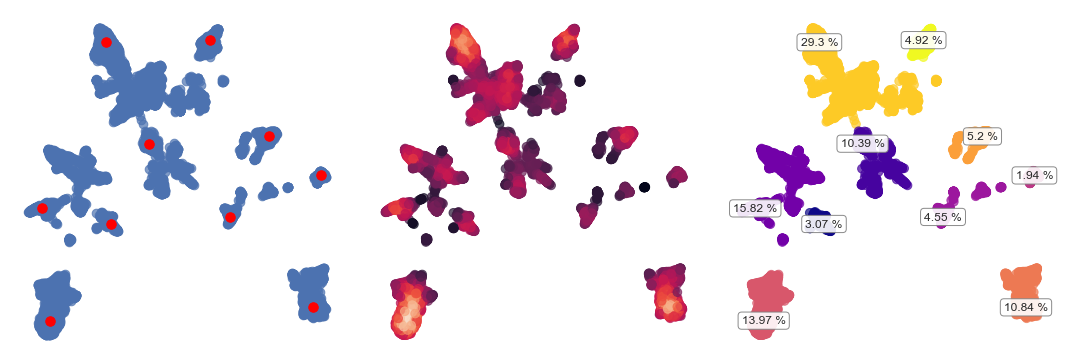

In [10]:
cerebellum_slide.plot_clusters(data_type='UMAP')

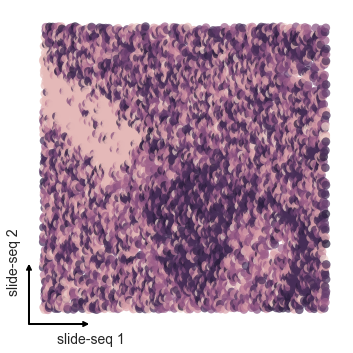

In [12]:
cerebellum_slide.plot(data_type='slide-seq', color=cerebellum_slide.clu['UMAP'].membership)

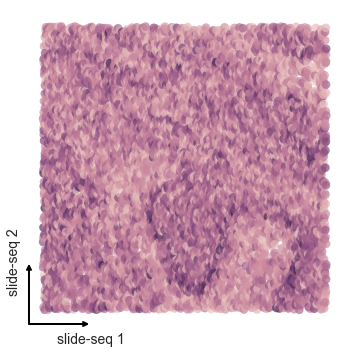

In [14]:
cerebellum_slide.plot(data_type='slide-seq', color=cerebellum_slide.data['PCA'][:,0])